<a href="https://colab.research.google.com/github/pkams/bootcamp_IGTI/blob/master/aplicacaoRegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [0]:
idade = [10, 25, 57,45, 26, 64, 37, 40, 24, 33]
salarioAnual = [15000, 29000, 68000, 52000, 32000, 80000, 41000, 45000, 26000, 33000]

In [5]:
np.shape(idade), np.shape(salarioAnual)

((10,), (10,))

In [0]:
xData = np.array(idade)
yData = np.array(salarioAnual)

In [0]:
def equacaoLinear(x,a,b):
  return a*x+b

In [0]:
parametros_iniciais = np.array([1.0,1.0])

In [0]:
parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData, parametros_iniciais)

In [0]:
previsaoModelo = equacaoLinear(xData, *parametrosOtimizados)

In [0]:
erroAbsoluto = previsaoModelo-yData

In [12]:
SE = np.square(erroAbsoluto)

MSE = np.mean(SE)
print('SE ',SE)
print('MSE', MSE)

SE  [20444849.43181719   121289.14946318   334651.35449138   779412.93954929
  4565531.49812874 16790344.02210057  4797851.42764235  3330866.89160136
  2074114.40865465 28560237.59752569]
MSE 8179914.872097438


In [16]:
R2squared = 1.0 - (np.var(erroAbsoluto)/np.var(yData))
print('Coeficiente de Determinação: ', R2squared)

Coeficiente de Determinação:  0.9770542936068405


Text(0, 0.5, 'Salário Anual (R$)')

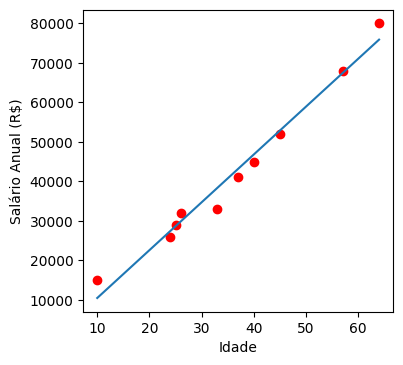

In [18]:
f = plt.figure(figsize=(4,4), dpi=100)
axes = f.add_subplot(111)

axes.plot(xData,yData, 'ro')

xModel = np.linspace(min(xData), max(xData))
yModel = equacaoLinear(xModel, *parametrosOtimizados)

axes.plot(xModel, yModel)
plt.xlabel('Idade')
plt.ylabel('Salário Anual (R$)')

In [0]:
########################

In [0]:
# Com Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
reg = LinearRegression()
x_ModeloSkLearn = xData.reshape(-1,1)
regression = reg.fit(x_ModeloSkLearn, yData)

In [0]:
previsao = reg.predict(x_ModeloSkLearn)

In [24]:
MSE = mean_squared_error(yData, previsao)
print('MSE ', MSE)

MSE  8179914.87209743


In [25]:
# Parametros encontrados

print('Y = {}X {}'.format(reg.coef_, reg.intercept_))

from sklearn.metrics import r2_score
R_2 = r2_score(yData, previsao)

print('Coeficiente de Determinação(R2): ', R_2)

Y = [1211.55548064]X -1637.1528509418858
Coeficiente de Determinação(R2):  0.9770542936068405


In [0]:
# Outros dados

In [0]:
import pandas as pd

In [28]:
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain (1).csv


In [29]:
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [0]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [0]:
reg = LinearRegression()
X = x.reshape(-1,1)

In [0]:
regressao = reg.fit(X,y)
previsao = reg.predict(X)

In [46]:
# Modelo adquirido

print('Y = {}X {}'.format(reg.coef_, reg.intercept_))

R_2 = r2_score(y, previsao)

print('Coeficiente de determinação(R2): ', R_2)

Y = [0.26342934]X 325.5734210494426
Coeficiente de determinação(R2):  0.639311719957


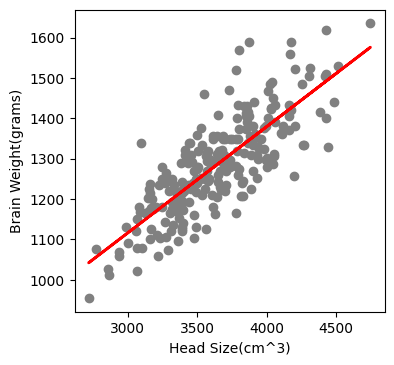

In [48]:
# Plot dos dados

plt.figure(figsize=(4,4), dpi = 100)
plt.scatter(X,y, color='gray')
plt.plot(x, previsao, color='red', linewidth=2)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()